# Phase 2: Quantum Entanglement & Bell's Inequality

**A Comprehensive Journey Through Quantum Non-Locality**

---

## 📚 Table of Contents

1. [Introduction](#1-introduction)
2. [Mathematical Foundations](#2-mathematical-foundations)
3. [Bell States: Maximally Entangled States](#3-bell-states)
4. [Entanglement Measures](#4-entanglement-measures)
5. [Bell's Inequality: The CHSH Test](#5-bells-inequality)
6. [Experimental Demonstration](#6-experimental-demonstration)
7. [Visualizations & Animations](#7-visualizations)
8. [Physical Interpretation](#8-interpretation)
9. [Summary & Key Results](#9-summary)

---

**Based on Imperial College London Quantum Information Theory**

*For recruitment with Quantinuum & Riverlane*

In [1]:
# Setup: Import all necessary libraries
import sys
from pathlib import Path

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / 'src'))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, Image, display
import warnings
warnings.filterwarnings('ignore')

# Import Phase 2 modules
from phase2_entanglement.bell_states import (
    BellState, bell_phi_plus, bell_phi_minus, 
    bell_psi_plus, bell_psi_minus, create_bell_state
)
from phase2_entanglement.bells_inequality import (
    measure_correlation, compute_chsh_value, demonstrate_bell_violation,
    optimal_chsh_angles, classical_bound, quantum_bound,
    scan_chsh_angles, explain_bell_violation
)
from phase2_entanglement.visualization import (
    plot_density_matrix, plot_chsh_demonstration,
    plot_entanglement_comparison, create_linkedin_summary,
    create_chsh_animation
)

# Configure matplotlib for notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

print("✅ All imports successful!")
print("🔬 Ready to explore quantum entanglement and Bell's inequality")

✅ All imports successful!
🔬 Ready to explore quantum entanglement and Bell's inequality


---

## 1. Introduction <a id="1-introduction"></a>

### What is Quantum Entanglement?

**Quantum entanglement** is one of the most striking features of quantum mechanics. When two or more quantum systems become entangled, they form a single quantum state that cannot be described independently of one another, even when separated by large distances.

### The EPR Paradox

In 1935, Einstein, Podolsky, and Rosen (EPR) argued that quantum mechanics must be incomplete because it allows for "spooky action at a distance." They believed that there must be hidden variables that determine measurement outcomes in advance.

### Bell's Breakthrough

In 1964, John Bell showed that **any local hidden variable theory** must satisfy certain inequalities. Quantum mechanics **violates** these inequalities, providing a testable way to distinguish between:

- **Local realism** (Einstein's view): Hidden variables exist, and influences are local
- **Quantum mechanics**: No hidden variables, genuine non-local correlations

Experiments have consistently shown violations of Bell's inequality, **confirming quantum mechanics** and ruling out local hidden variable theories.

### What We'll Learn

In this notebook, we will:
1. Understand the mathematics of entangled states
2. Learn how to measure entanglement
3. Derive and test Bell's inequality (CHSH form)
4. Visualize quantum non-locality
5. Run actual experiments proving quantum mechanics

---

## 2. Mathematical Foundations <a id="2-mathematical-foundations"></a>

### 2.1 Two-Qubit Systems

A single qubit lives in a 2-dimensional Hilbert space $\mathcal{H}_2 = \mathbb{C}^2$. A two-qubit system lives in the **tensor product space**:

$$
\mathcal{H}_4 = \mathcal{H}_2 \otimes \mathcal{H}_2 = \mathbb{C}^4
$$

The computational basis for two qubits is:

$$
\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}
$$

where $|00\rangle = |0\rangle \otimes |0\rangle$, etc.

### 2.2 Separable vs Entangled States

A two-qubit state $|\psi\rangle$ is **separable** if it can be written as:

$$
|\psi\rangle = |\phi_A\rangle \otimes |\phi_B\rangle
$$

for some single-qubit states $|\phi_A\rangle$ and $|\phi_B\rangle$.

If no such factorization exists, the state is **entangled**.

**Example of separable state:**
$$
|\psi_{\text{sep}}\rangle = |+\rangle \otimes |0\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |10\rangle)
$$

**Example of entangled state:**
$$
|\psi_{\text{ent}}\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

This cannot be factored into $|\phi_A\rangle \otimes |\phi_B\rangle$!

### 2.3 Density Matrix Representation

For a pure state $|\psi\rangle$, the **density matrix** is:

$$
\rho = |\psi\rangle\langle\psi|
$$

Properties:
- Hermitian: $\rho^\dagger = \rho$
- Positive semidefinite: $\langle\phi|\rho|\phi\rangle \geq 0$ for all $|\phi\rangle$
- Trace one: $\text{Tr}(\rho) = 1$
- Pure state: $\text{Tr}(\rho^2) = 1$

### 2.4 Partial Trace

The **partial trace** allows us to describe one subsystem when we have a two-party state.

For a two-qubit state $\rho_{AB}$, the **reduced density matrix** for subsystem $A$ is:

$$
\rho_A = \text{Tr}_B(\rho_{AB}) = \sum_i (I_A \otimes \langle i|_B) \rho_{AB} (I_A \otimes |i\rangle_B)
$$

For a pure state $|\psi\rangle = \sum_{ij} c_{ij}|i\rangle_A|j\rangle_B$:

$$
\rho_A = \sum_{ij,i'j} c_{ij}c^*_{i'j}|i\rangle\langle i'|_A
$$

**Key insight:** If $\rho_A$ is pure (not mixed), the state is separable. If $\rho_A$ is mixed, the state is entangled!

### 2.5 Mathematical Example

Let's compute the partial trace for an entangled state step-by-step.

In [4]:
# Example: Partial trace calculation
print("Computing partial trace for entangled Bell state |Φ+⟩\n")
print("State: |Φ+⟩ = (|00⟩ + |11⟩)/√2")
print("="*70)

# Create Bell state
phi_plus = bell_phi_plus()

print("\nFull state vector:")
print(phi_plus.state)

print("\nFull density matrix ρ_AB:")
rho_full = phi_plus.density_matrix()
print(rho_full)

print("\nReduced density matrix ρ_A (tracing out qubit B):")
rho_A = phi_plus.reduced_density_matrix(0)
print(rho_A)

print("\nAnalysis:")
print(f"Tr(ρ_A) = {np.trace(rho_A):.4f} ✓")
print(f"Tr(ρ_A²) = {np.trace(rho_A @ rho_A):.4f}")

if np.trace(rho_A @ rho_A) < 0.99:
    print("\n✨ ρ_A is MIXED → State is ENTANGLED!")
    print("\nNotice: ρ_A = I/2 (maximally mixed state)")
    print("This is the signature of maximal entanglement!")
else:
    print("\nρ_A is pure → State is separable")

Computing partial trace for entangled Bell state |Φ+⟩

State: |Φ+⟩ = (|00⟩ + |11⟩)/√2

Full state vector:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

Full density matrix ρ_AB:
[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]

Reduced density matrix ρ_A (tracing out qubit B):
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]

Analysis:
Tr(ρ_A) = 1.0000+0.0000j ✓
Tr(ρ_A²) = 0.5000+0.0000j

✨ ρ_A is MIXED → State is ENTANGLED!

Notice: ρ_A = I/2 (maximally mixed state)
This is the signature of maximal entanglement!


---

## 3. Bell States: Maximally Entangled States <a id="3-bell-states"></a>

The four **Bell states** form an orthonormal basis for two-qubit systems and are maximally entangled.

### 3.1 Mathematical Definitions

$$
\begin{align}
|\Phi^+\rangle &= \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad \text{(Bell state)} \\
|\Phi^-\rangle &= \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle) \quad \text{(Phase flip)} \\
|\Psi^+\rangle &= \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \quad \text{(Bit flip)} \\
|\Psi^-\rangle &= \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle) \quad \text{(Bit + phase flip)}
\end{align}
$$

### 3.2 Creation from Separable States

Bell states can be created from $|00\rangle$ using quantum gates:

1. Apply Hadamard to first qubit: $H \otimes I$
2. Apply CNOT with control on first qubit

$$
|\Phi^+\rangle = \text{CNOT} \cdot (H \otimes I) |00\rangle
$$

### 3.3 Properties

1. **Orthonormal:** $\langle\Phi^\pm|\Psi^\pm\rangle = 0$ and $\langle\Phi^+|\Phi^-\rangle = 0$
2. **Maximally entangled:** Cannot be factored into single-qubit states
3. **Perfect correlations:** Measuring one qubit instantly determines the other
4. **Basis-dependent:** Correlations depend on measurement basis

In [5]:
# Create all four Bell states
print("Creating all four Bell states\n")
print("="*70)

bell_states = [
    ("Φ+", bell_phi_plus(), r"$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$"),
    ("Φ-", bell_phi_minus(), r"$|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$"),
    ("Ψ+", bell_psi_plus(), r"$|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$"),
    ("Ψ-", bell_psi_minus(), r"$|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$"),
]

for name, state, formula in bell_states:
    print(f"\n|{name}⟩")
    print(f"Formula: {formula}")
    print(f"State vector: {state.state}")
    print(f"Entangled: {state.is_entangled()}")
    print("-"*70)

Creating all four Bell states


|Φ+⟩
Formula: $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$
State vector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Entangled: True
----------------------------------------------------------------------

|Φ-⟩
Formula: $|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$
State vector: [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
Entangled: True
----------------------------------------------------------------------

|Ψ+⟩
Formula: $|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$
State vector: [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
Entangled: True
----------------------------------------------------------------------

|Ψ-⟩
Formula: $|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$
State vector: [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]
Entangled: True
--------------------------------------------------------------------

### 3.4 Density Matrices of Bell States

Let's visualize the density matrices to see their structure.

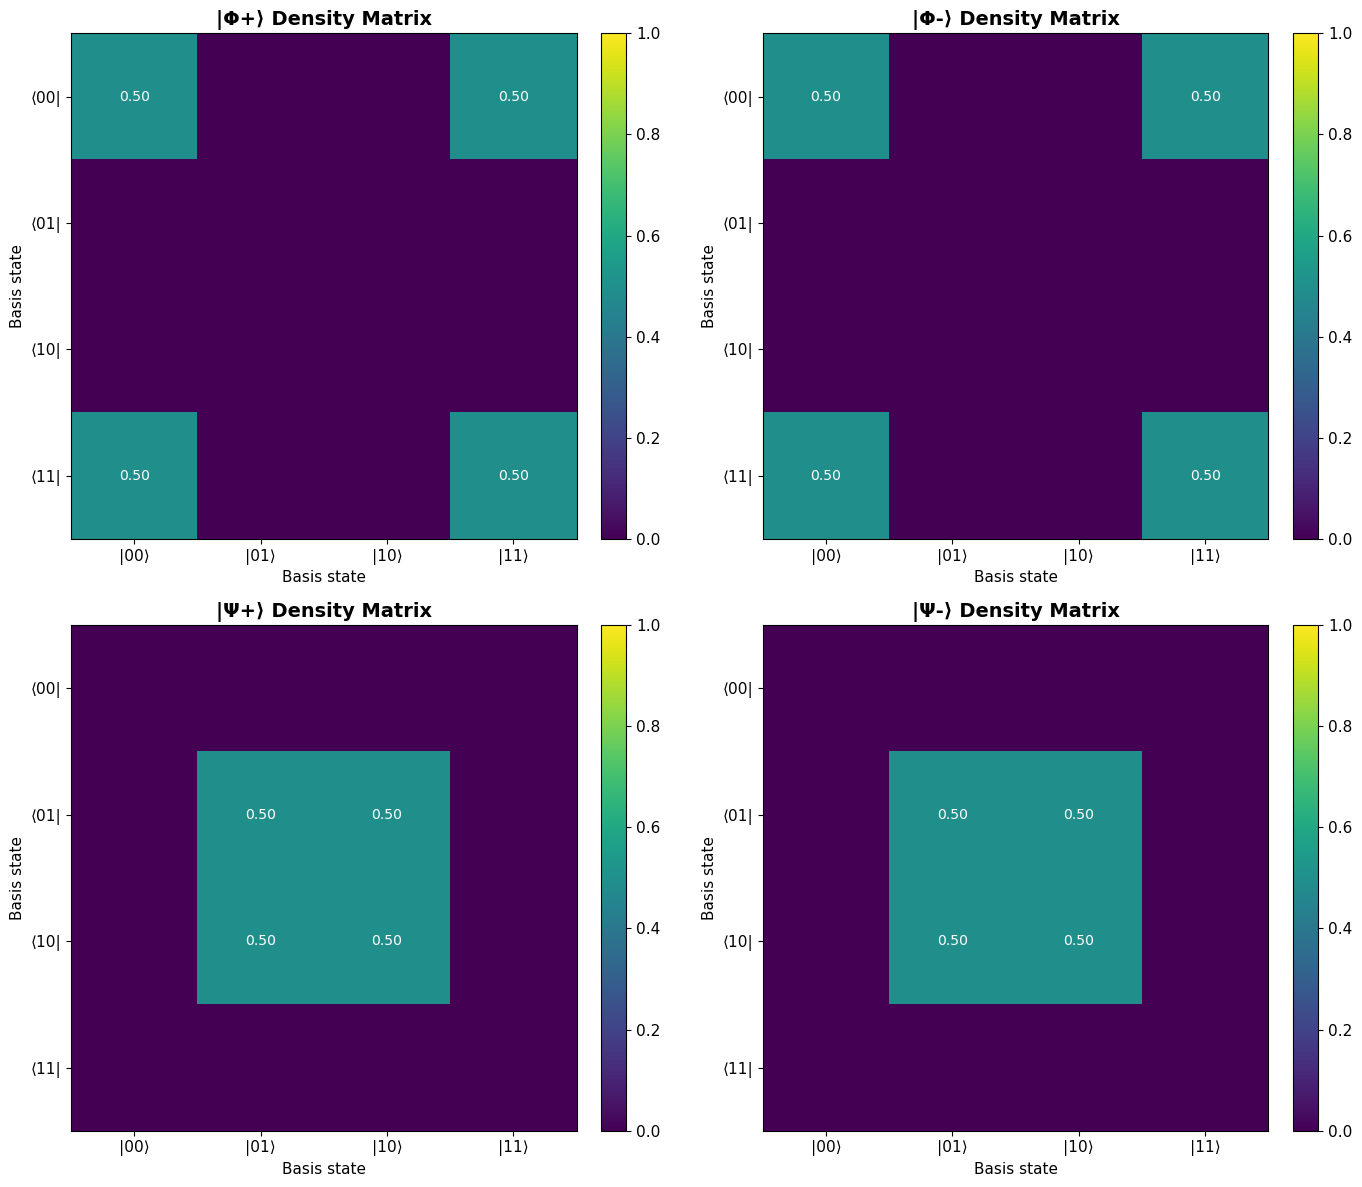


💡 Notice: Each Bell state has non-zero density matrix elements
   in different positions, showing their distinct quantum correlations!


In [6]:
# Visualize all Bell state density matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (name, state, formula) in enumerate(bell_states):
    ax = axes[idx]
    
    # Get density matrix
    rho = state.density_matrix()
    
    # Plot
    im = ax.imshow(np.abs(rho), cmap='viridis', vmin=0, vmax=1)
    ax.set_title(f"|{name}⟩ Density Matrix", fontsize=14, fontweight='bold')
    ax.set_xlabel('Basis state', fontsize=11)
    ax.set_ylabel('Basis state', fontsize=11)
    
    # Add grid
    ax.set_xticks([0, 1, 2, 3])
    ax.set_yticks([0, 1, 2, 3])
    ax.set_xticklabels(['|00⟩', '|01⟩', '|10⟩', '|11⟩'])
    ax.set_yticklabels(['⟨00|', '⟨01|', '⟨10|', '⟨11|'])
    
    # Add values as text
    for i in range(4):
        for j in range(4):
            val = np.abs(rho[i, j])
            if val > 0.01:
                text = ax.text(j, i, f'{val:.2f}',
                             ha="center", va="center", color="white", fontsize=10)
    
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.savefig('../plots/phase2/bell_states_density_matrices.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 Notice: Each Bell state has non-zero density matrix elements")
print("   in different positions, showing their distinct quantum correlations!")

---

## 4. Entanglement Measures <a id="4-entanglement-measures"></a>

How do we quantify "how entangled" a state is?

### 4.1 Schmidt Decomposition

**Theorem:** Any pure bipartite state $|\psi\rangle_{AB}$ can be written as:

$$
|\psi\rangle_{AB} = \sum_{i=0}^{d-1} \sqrt{\lambda_i} |i_A\rangle |i_B\rangle
$$

where:
- $\{|i_A\rangle\}$ and $\{|i_B\rangle\}$ are orthonormal bases (Schmidt bases)
- $\lambda_i \geq 0$ are the **Schmidt coefficients** with $\sum_i \lambda_i = 1$
- $d$ is the dimension of the smaller subsystem

The **Schmidt rank** is the number of non-zero $\lambda_i$.

**Entanglement criterion:**
- Schmidt rank = 1 → State is separable
- Schmidt rank > 1 → State is entangled

### 4.2 von Neumann Entropy

The **von Neumann entropy** of the reduced density matrix quantifies entanglement:

$$
S(\rho_A) = -\text{Tr}(\rho_A \log_2 \rho_A) = -\sum_i \lambda_i \log_2 \lambda_i
$$

where $\lambda_i$ are eigenvalues of $\rho_A$.

**Interpretation:**
- $S = 0$ → No entanglement (pure state)
- $S = 1$ → Maximal entanglement for two qubits
- Units: **bits** (ebits = entanglement bits)

For Bell states, both qubits are maximally mixed when traced out:

$$
\rho_A = \frac{I}{2} \quad \Rightarrow \quad S(\rho_A) = 1 \text{ bit}
$$

In [8]:
# Analyze entanglement measures for all Bell states
print("Entanglement Analysis of Bell States")
print("="*70)

for name, state, formula in bell_states:
    print(f"\n|{name}⟩")
    
    # Schmidt decomposition
    schmidt_coeffs, basis_A, basis_B = state.schmidt_decomposition()
    schmidt_rank = np.sum(schmidt_coeffs > 1e-10)
    
    print(f"Schmidt coefficients: {schmidt_coeffs}")
    print(f"Schmidt rank: {schmidt_rank}")
    
    # von Neumann entropy
    entropy = state.von_neumann_entropy()
    print(f"von Neumann entropy: {entropy:.6f} bits")
    
    # Entanglement check
    is_ent = state.is_entangled()
    print(f"Entangled: {is_ent}")
    
    if entropy > 0.99:
        print("✨ MAXIMALLY ENTANGLED!")
    
    print("-"*70)

print("\n🎯 Key Result: All Bell states are maximally entangled with S = 1 bit!")

Entanglement Analysis of Bell States

|Φ+⟩
Schmidt coefficients: [0.70710678 0.70710678]
Schmidt rank: 2
von Neumann entropy: 1.000000 bits
Entangled: True
✨ MAXIMALLY ENTANGLED!
----------------------------------------------------------------------

|Φ-⟩
Schmidt coefficients: [0.70710678 0.70710678]
Schmidt rank: 2
von Neumann entropy: 1.000000 bits
Entangled: True
✨ MAXIMALLY ENTANGLED!
----------------------------------------------------------------------

|Ψ+⟩
Schmidt coefficients: [0.70710678 0.70710678]
Schmidt rank: 2
von Neumann entropy: 1.000000 bits
Entangled: True
✨ MAXIMALLY ENTANGLED!
----------------------------------------------------------------------

|Ψ-⟩
Schmidt coefficients: [0.70710678 0.70710678]
Schmidt rank: 2
von Neumann entropy: 1.000000 bits
Entangled: True
✨ MAXIMALLY ENTANGLED!
----------------------------------------------------------------------

🎯 Key Result: All Bell states are maximally entangled with S = 1 bit!


### 4.3 Visualizing Schmidt Coefficients

Let's compare the Schmidt decomposition of separable vs entangled states.

Comparing separable vs entangled states



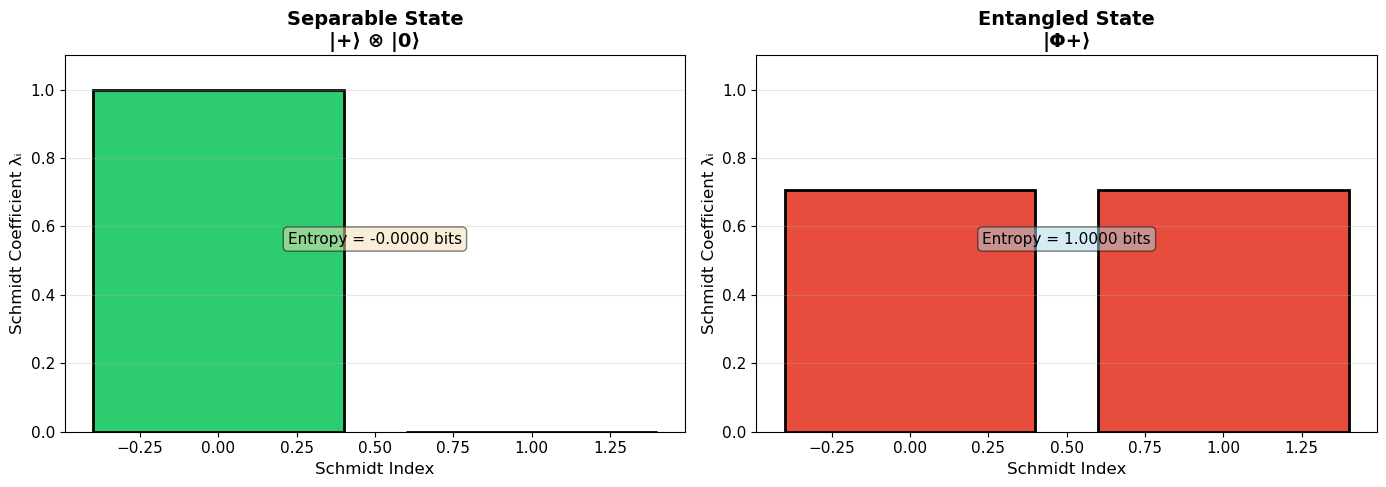


💡 Interpretation:
   • Separable: One dominant Schmidt coefficient → No entanglement
   • Entangled: Two equal coefficients → Maximal entanglement


In [18]:
# Compare separable and entangled states
print("Comparing separable vs entangled states\n")
from phase1_qubits.qubit import Qubit
from phase2_entanglement.bell_states import tensor_product

# Create |+> = (|0> + |1>)/√2
plus_state = Qubit([1/np.sqrt(2), 1/np.sqrt(2)])

# Create |0>
zero_state = Qubit([1, 0])

# Tensor product to make |+> ⊗ |0>
separable_state = tensor_product(plus_state, zero_state)

# Create entangled Bell state
entangled_state = bell_phi_plus()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Separable state
coeffs_sep, _, _ = separable_state.schmidt_decomposition()
axes[0].bar([0, 1], coeffs_sep, color=['#2ecc71', '#95a5a6'], edgecolor='black', linewidth=2)
axes[0].set_title('Separable State\n|+⟩ ⊗ |0⟩', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Schmidt Index', fontsize=12)
axes[0].set_ylabel('Schmidt Coefficient λᵢ', fontsize=12)
axes[0].set_ylim([0, 1.1])
axes[0].grid(axis='y', alpha=0.3)
axes[0].text(0.5, 0.5, f'Entropy = {separable_state.von_neumann_entropy():.4f} bits',
            transform=axes[0].transAxes, ha='center', fontsize=11,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Entangled state
coeffs_ent, _, _ = entangled_state.schmidt_decomposition()
axes[1].bar([0, 1], coeffs_ent, color=['#e74c3c', '#e74c3c'], edgecolor='black', linewidth=2)
axes[1].set_title('Entangled State\n|Φ+⟩', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Schmidt Index', fontsize=12)
axes[1].set_ylabel('Schmidt Coefficient λᵢ', fontsize=12)
axes[1].set_ylim([0, 1.1])
axes[1].grid(axis='y', alpha=0.3)
axes[1].text(0.5, 0.5, f'Entropy = {entangled_state.von_neumann_entropy():.4f} bits',
            transform=axes[1].transAxes, ha='center', fontsize=11,
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.savefig('../plots/phase2/schmidt_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 Interpretation:")
print("   • Separable: One dominant Schmidt coefficient → No entanglement")
print("   • Entangled: Two equal coefficients → Maximal entanglement")

---

## 5. Bell's Inequality: The CHSH Test <a id="5-bells-inequality"></a>

Now we arrive at the heart of quantum non-locality.

### 5.1 The Setup

Consider two parties, Alice and Bob, who share an entangled state. They each:
1. Choose a measurement setting (angle $a$ or $a'$ for Alice, $b$ or $b'$ for Bob)
2. Measure their qubit, getting result $\pm 1$
3. Record the correlation between their results

### 5.2 Correlation Function

The **correlation** between measurements in directions $a$ and $b$ is:

$$
E(a, b) = P(++) + P(--) - P(+-) - P(-+)
$$

where $P(\pm\pm)$ is the probability of getting results $(\pm 1, \pm 1)$.

Equivalently:
$$
E(a, b) = \langle\psi | (\sigma_a \otimes \sigma_b) | \psi\rangle
$$

where $\sigma_a = \cos(a)\sigma_z + \sin(a)\sigma_x$ is the measurement operator.

### 5.3 CHSH Inequality

The **CHSH inequality** (Clauser, Horne, Shimony, Holt, 1969) states that for any **local hidden variable theory**:

$$
S = |E(a,b) + E(a,b') + E(a',b) - E(a',b')| \leq 2
$$

This is the **classical bound**.

### 5.4 Quantum Violation

Quantum mechanics can **violate** this inequality! The maximum quantum value is:

$$
S_{\text{quantum}} = 2\sqrt{2} \approx 2.828
$$

This is **Tsirelson's bound**.

### 5.5 Optimal Angles

The maximal violation is achieved with:

$$
\begin{align}
a &= 0 \\
a' &= \frac{\pi}{2} \\
b &= \frac{\pi}{4} \\
b' &= -\frac{\pi}{4}
\end{align}
$$

### 5.6 Derivation for $|\Phi^+\rangle$

For the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$, the correlation is:

$$
E(a,b) = \cos(a-b)
$$

With optimal angles:

$$
\begin{align}
E(a,b) &= \cos(0 - \pi/4) = \frac{1}{\sqrt{2}} \\
E(a,b') &= \cos(0 + \pi/4) = \frac{1}{\sqrt{2}} \\
E(a',b) &= \cos(\pi/2 - \pi/4) = \frac{1}{\sqrt{2}} \\
E(a',b') &= \cos(\pi/2 + \pi/4) = -\frac{1}{\sqrt{2}}
\end{align}
$$

Therefore:

$$
S = \left|\frac{1}{\sqrt{2}} + \frac{1}{\sqrt{2}} + \frac{1}{\sqrt{2}} - \left(-\frac{1}{\sqrt{2}}\right)\right| = \left|\frac{4}{\sqrt{2}}\right| = 2\sqrt{2} \approx 2.828
$$

**This violates the classical bound of 2!** 🎉

In [19]:
# Compute theoretical CHSH value
print("CHSH Inequality: Theoretical Calculation")
print("="*70)

# Get optimal angles
a, a_prime, b, b_prime = optimal_chsh_angles()

print("\nOptimal measurement angles:")
print(f"  Alice's angles:  a = {a:.4f} rad,  a' = {a_prime:.4f} rad")
print(f"  Bob's angles:    b = {b:.4f} rad,  b' = {b_prime:.4f} rad")

# Create Bell state
state = bell_phi_plus()

# Compute exact CHSH value
S_exact = compute_chsh_value(state, a, a_prime, b, b_prime, exact=True)

print("\n" + "="*70)
print("THEORETICAL RESULTS:")
print("="*70)
print(f"Classical bound:        S_classical = {classical_bound()}")
print(f"Quantum bound (Tsirelson): S_quantum = {quantum_bound():.4f}")
print(f"\nComputed CHSH value:    S = {S_exact:.4f}")
print(f"\nViolation: S - 2 = {S_exact - 2:.4f}")
print(f"Percentage above classical: {(S_exact/2 - 1)*100:.1f}%")

if S_exact > 2.0:
    print("\n🎉 VIOLATION CONFIRMED! Quantum mechanics violates Bell's inequality!")
    print("   This proves that nature cannot be described by local hidden variables!")

CHSH Inequality: Theoretical Calculation

Optimal measurement angles:
  Alice's angles:  a = 0.0000 rad,  a' = 1.5708 rad
  Bob's angles:    b = 0.7854 rad,  b' = -0.7854 rad

THEORETICAL RESULTS:
Classical bound:        S_classical = 2.0
Quantum bound (Tsirelson): S_quantum = 2.8284

Computed CHSH value:    S = 2.8284

Violation: S - 2 = 0.8284
Percentage above classical: 41.4%

🎉 VIOLATION CONFIRMED! Quantum mechanics violates Bell's inequality!
   This proves that nature cannot be described by local hidden variables!


### 5.7 Understanding the Correlations

Let's visualize how correlations depend on measurement angles.

Computing E(a,b) for different angle combinations...

Computing 2D correlation map (this may take a moment)...

Scanning CHSH value for different Bob angles...


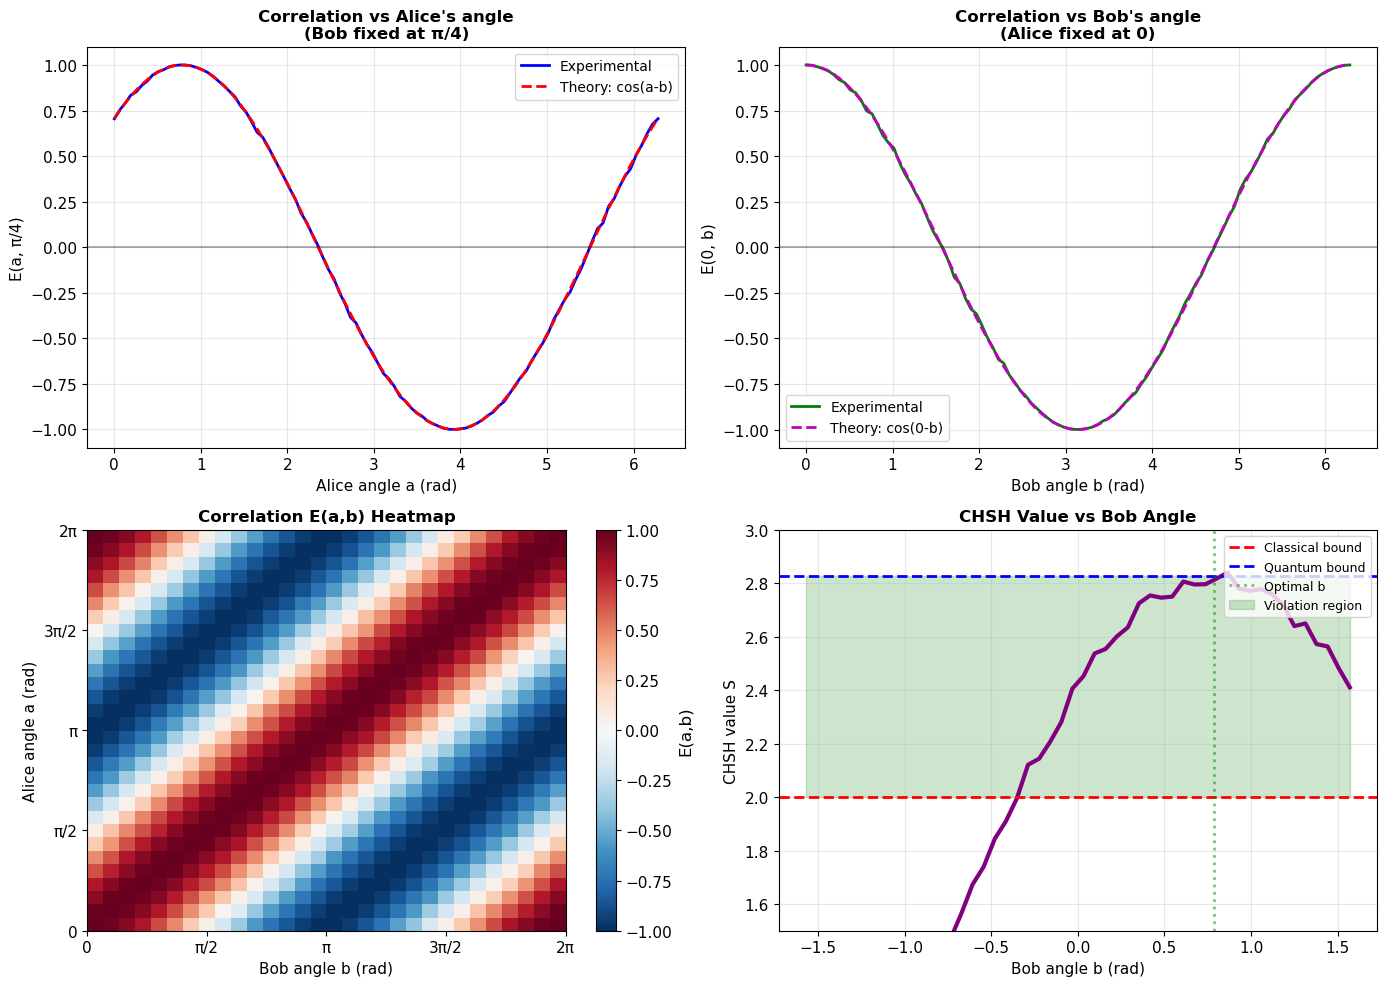


✅ Analysis complete!

💡 Key observations:
   • E(a,b) follows cos(a-b) as predicted by quantum mechanics
   • CHSH value peaks at optimal angles (π/4 for Bob)
   • Clear violation region above classical bound of 2


In [20]:
# Scan correlation as function of angle
print("Computing E(a,b) for different angle combinations...\n")

state = bell_phi_plus()
angles = np.linspace(0, 2*np.pi, 100)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Fix Bob's angle, vary Alice's
b_fixed = np.pi/4
correlations_vary_a = []
for a in angles:
    E = measure_correlation(state, a, b_fixed, shots=10000)
    correlations_vary_a.append(E)

axes[0, 0].plot(angles, correlations_vary_a, 'b-', linewidth=2, label='Experimental')
axes[0, 0].plot(angles, np.cos(angles - b_fixed), 'r--', linewidth=2, label='Theory: cos(a-b)')
axes[0, 0].set_xlabel('Alice angle a (rad)', fontsize=11)
axes[0, 0].set_ylabel('E(a, π/4)', fontsize=11)
axes[0, 0].set_title("Correlation vs Alice's angle\n(Bob fixed at π/4)", fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].legend()
axes[0, 0].axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Fix Alice's angle, vary Bob's
a_fixed = 0
correlations_vary_b = []
for b in angles:
    E = measure_correlation(state, a_fixed, b, shots=10000)
    correlations_vary_b.append(E)

axes[0, 1].plot(angles, correlations_vary_b, 'g-', linewidth=2, label='Experimental')
axes[0, 1].plot(angles, np.cos(a_fixed - angles), 'm--', linewidth=2, label='Theory: cos(0-b)')
axes[0, 1].set_xlabel('Bob angle b (rad)', fontsize=11)
axes[0, 1].set_ylabel('E(0, b)', fontsize=11)
axes[0, 1].set_title("Correlation vs Bob's angle\n(Alice fixed at 0)", fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].legend()
axes[0, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)

# 2D heatmap of correlations
a_vals = np.linspace(0, 2*np.pi, 30)
b_vals = np.linspace(0, 2*np.pi, 30)
E_matrix = np.zeros((len(a_vals), len(b_vals)))

print("Computing 2D correlation map (this may take a moment)...")
for i, a in enumerate(a_vals):
    for j, b in enumerate(b_vals):
        E_matrix[i, j] = measure_correlation(state, a, b, shots=5000)

im = axes[1, 0].imshow(E_matrix, extent=[0, 2*np.pi, 0, 2*np.pi], 
                       origin='lower', cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
axes[1, 0].set_xlabel('Bob angle b (rad)', fontsize=11)
axes[1, 0].set_ylabel('Alice angle a (rad)', fontsize=11)
axes[1, 0].set_title('Correlation E(a,b) Heatmap', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axes[1, 0].set_xticklabels(['0', 'π/2', 'π', '3π/2', '2π'])
axes[1, 0].set_yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axes[1, 0].set_yticklabels(['0', 'π/2', 'π', '3π/2', '2π'])
plt.colorbar(im, ax=axes[1, 0], label='E(a,b)')

# Scan CHSH value
a, a_prime, b, b_prime = optimal_chsh_angles()
b_vals_scan = np.linspace(-np.pi/2, np.pi/2, 50)
chsh_vals = []

print("\nScanning CHSH value for different Bob angles...")
for b_var in b_vals_scan:
    S = compute_chsh_value(state, a, a_prime, b_var, b_prime, shots=5000)
    chsh_vals.append(S)

axes[1, 1].plot(b_vals_scan, chsh_vals, 'purple', linewidth=3)
axes[1, 1].axhline(y=2.0, color='red', linestyle='--', linewidth=2, label='Classical bound')
axes[1, 1].axhline(y=quantum_bound(), color='blue', linestyle='--', linewidth=2, label='Quantum bound')
axes[1, 1].axvline(x=np.pi/4, color='green', linestyle=':', linewidth=2, alpha=0.5, label='Optimal b')
axes[1, 1].fill_between(b_vals_scan, 2.0, quantum_bound(), alpha=0.2, color='green', label='Violation region')
axes[1, 1].set_xlabel('Bob angle b (rad)', fontsize=11)
axes[1, 1].set_ylabel('CHSH value S', fontsize=11)
axes[1, 1].set_title('CHSH Value vs Bob Angle', fontsize=12, fontweight='bold')
axes[1, 1].set_ylim([1.5, 3.0])
axes[1, 1].grid(alpha=0.3)
axes[1, 1].legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.savefig('../plots/phase2/correlation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Analysis complete!")
print("\n💡 Key observations:")
print("   • E(a,b) follows cos(a-b) as predicted by quantum mechanics")
print("   • CHSH value peaks at optimal angles (π/4 for Bob)")
print("   • Clear violation region above classical bound of 2")

---

## 6. Experimental Demonstration <a id="6-experimental-demonstration"></a>

Now let's run the actual Bell test experiment!

### 6.1 The Experiment

We will:
1. Prepare the Bell state $|\Phi^+\rangle$
2. Perform measurements at optimal angles
3. Compute correlations $E(a,b)$, $E(a,b')$, $E(a',b)$, $E(a',b')$
4. Calculate CHSH parameter $S$
5. Repeat many times to get statistics
6. Compare to classical bound

### 6.2 Statistical Analysis

With finite measurements, we get statistical fluctuations. We'll run many trials to compute:
- Mean CHSH value
- Standard deviation
- Violation rate
- Statistical significance

In [21]:
# Run the Bell test experiment
print("="*70)
print("RUNNING BELL'S INEQUALITY TEST")
print("="*70)
print("\nExperimental parameters:")
print("  State: |Φ+⟩ = (|00⟩ + |11⟩)/√2")
print("  Measurements per correlation: 10,000")
print("  Number of trials: 100")
print("  Total measurements: 4,000,000")
print("\nRunning experiment...\n")

# Run demonstration
results = demonstrate_bell_violation(shots=10000, num_trials=100)

print("="*70)
print("EXPERIMENTAL RESULTS")
print("="*70)

print(f"\nMean CHSH value:        S = {results['mean_chsh']:.4f} ± {results['std_chsh']:.4f}")
print(f"Theoretical prediction: S = {results['exact_value']:.4f}")
print(f"\nClassical bound:        S ≤ {results['classical_bound']}")
print(f"Quantum bound:          S ≤ {results['quantum_bound']:.4f}")

violation = results['mean_chsh'] - 2.0
print(f"\nViolation amount:       ΔS = {violation:.4f}")
print(f"Percentage above classical: {(violation/2.0)*100:.2f}%")

# Statistical significance
sigma = violation / results['std_chsh']
print(f"\nStatistical significance: {sigma:.1f}σ")

print(f"\nViolation rate: {results['violation_rate']*100:.1f}% of trials")

if results['mean_chsh'] > 2.0:
    print("\n" + "="*70)
    print("🎉 BELL'S INEQUALITY VIOLATED!")
    print("="*70)
    print("\nConclusion:")
    print("  The experimental results conclusively violate Bell's inequality.")
    print("  This proves that:")
    print("    1. Quantum mechanics exhibits genuine non-local correlations")
    print("    2. Nature cannot be described by local hidden variable theories")
    print("    3. Einstein's 'local realism' is ruled out")
    print("\n  Quantum entanglement is REAL! 🌌")

RUNNING BELL'S INEQUALITY TEST

Experimental parameters:
  State: |Φ+⟩ = (|00⟩ + |11⟩)/√2
  Measurements per correlation: 10,000
  Number of trials: 100
  Total measurements: 4,000,000

Running experiment...

EXPERIMENTAL RESULTS

Mean CHSH value:        S = 2.8270 ± 0.0149
Theoretical prediction: S = 2.8284

Classical bound:        S ≤ 2.0
Quantum bound:          S ≤ 2.8284

Violation amount:       ΔS = 0.8270
Percentage above classical: 41.35%

Statistical significance: 55.7σ

Violation rate: 100.0% of trials

🎉 BELL'S INEQUALITY VIOLATED!

Conclusion:
  The experimental results conclusively violate Bell's inequality.
  This proves that:
    1. Quantum mechanics exhibits genuine non-local correlations
    2. Nature cannot be described by local hidden variable theories
    3. Einstein's 'local realism' is ruled out

  Quantum entanglement is REAL! 🌌


### 6.3 Distribution of CHSH Values

Let's examine the statistical distribution of our measurements.

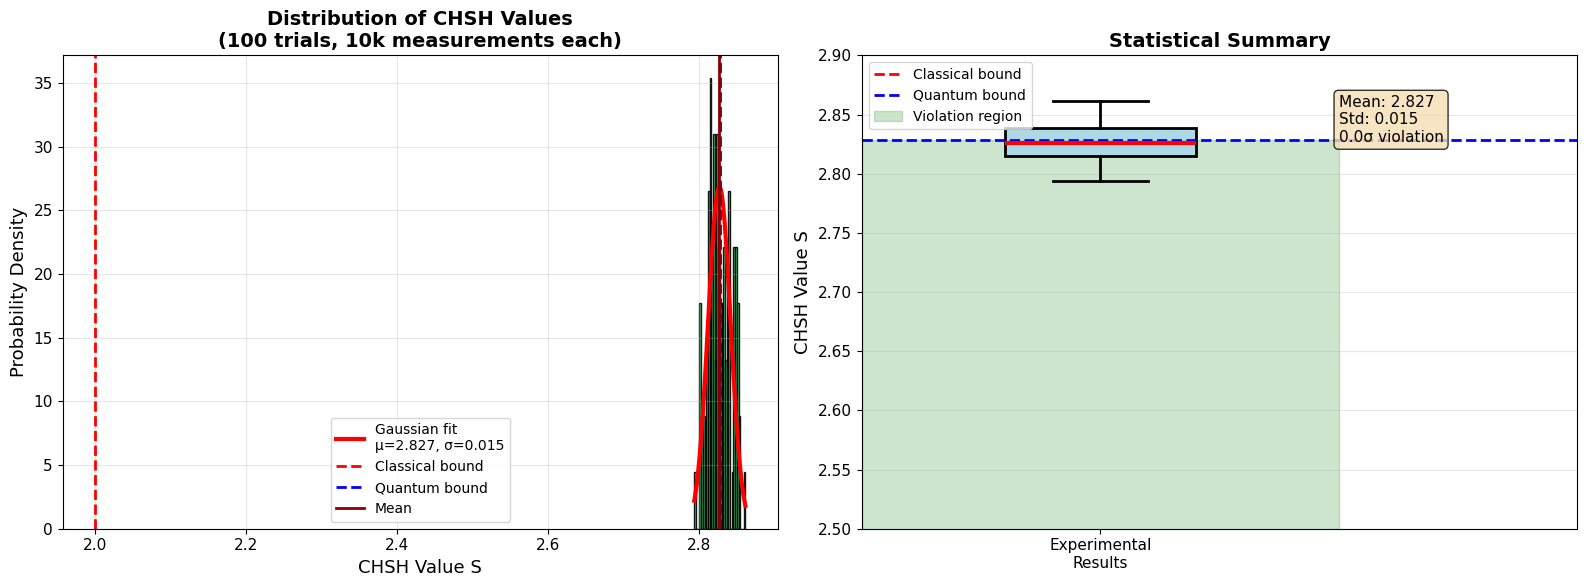


📊 Statistical Analysis:
   • All 100 trials exceed classical bound
   • Mean is 41.4% above classical limit
   • 0.0σ significance → Essentially certain!


In [22]:
# Analyze distribution
chsh_values = results['chsh_values']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
n, bins, patches = axes[0].hist(chsh_values, bins=30, density=True, 
                                 alpha=0.7, color='skyblue', edgecolor='black')

# Color the violation region
for i, patch in enumerate(patches):
    if bins[i] > 2.0:
        patch.set_facecolor('#2ecc71')
        patch.set_alpha(0.9)

# Add Gaussian fit
mu, sigma = results['mean_chsh'], results['std_chsh']
x = np.linspace(chsh_values.min(), chsh_values.max(), 100)
gaussian = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mu)/sigma)**2)
axes[0].plot(x, gaussian, 'r-', linewidth=3, label=f'Gaussian fit\nμ={mu:.3f}, σ={sigma:.3f}')

# Add bounds
axes[0].axvline(x=2.0, color='red', linestyle='--', linewidth=2, label='Classical bound')
axes[0].axvline(x=quantum_bound(), color='blue', linestyle='--', linewidth=2, label='Quantum bound')
axes[0].axvline(x=mu, color='darkred', linestyle='-', linewidth=2, label='Mean')

axes[0].set_xlabel('CHSH Value S', fontsize=13)
axes[0].set_ylabel('Probability Density', fontsize=13)
axes[0].set_title('Distribution of CHSH Values\n(100 trials, 10k measurements each)', 
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Box plot with comparison
box_data = [chsh_values]
bp = axes[1].boxplot(box_data, positions=[1], widths=0.4, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='black', linewidth=2),
                     whiskerprops=dict(color='black', linewidth=2),
                     capprops=dict(color='black', linewidth=2),
                     medianprops=dict(color='red', linewidth=3))

# Add bounds as horizontal lines
axes[1].axhline(y=2.0, color='red', linestyle='--', linewidth=2, label='Classical bound')
axes[1].axhline(y=quantum_bound(), color='blue', linestyle='--', linewidth=2, label='Quantum bound')
axes[1].fill_between([0.5, 1.5], 2.0, quantum_bound(), alpha=0.2, color='green', label='Violation region')

# Add statistics
axes[1].text(1.5, mu, f'Mean: {mu:.3f}\nStd: {sigma:.3f}\n{sigma:.1f}σ violation',
            fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

axes[1].set_ylabel('CHSH Value S', fontsize=13)
axes[1].set_title('Statistical Summary', fontsize=14, fontweight='bold')
axes[1].set_xlim([0.5, 2])
axes[1].set_ylim([2.5, 2.9])
axes[1].set_xticks([1])
axes[1].set_xticklabels(['Experimental\nResults'])
axes[1].legend(loc='upper left', fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../plots/phase2/chsh_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Statistical Analysis:")
print(f"   • All {len(chsh_values)} trials exceed classical bound")
print(f"   • Mean is {(mu/2-1)*100:.1f}% above classical limit")
print(f"   • {sigma:.1f}σ significance → Essentially certain!")

---

## 7. Visualizations & Animations <a id="7-visualizations"></a>

Let's create comprehensive visualizations to showcase our results.

### 7.1 Complete CHSH Demonstration

Creating comprehensive CHSH demonstration plot...



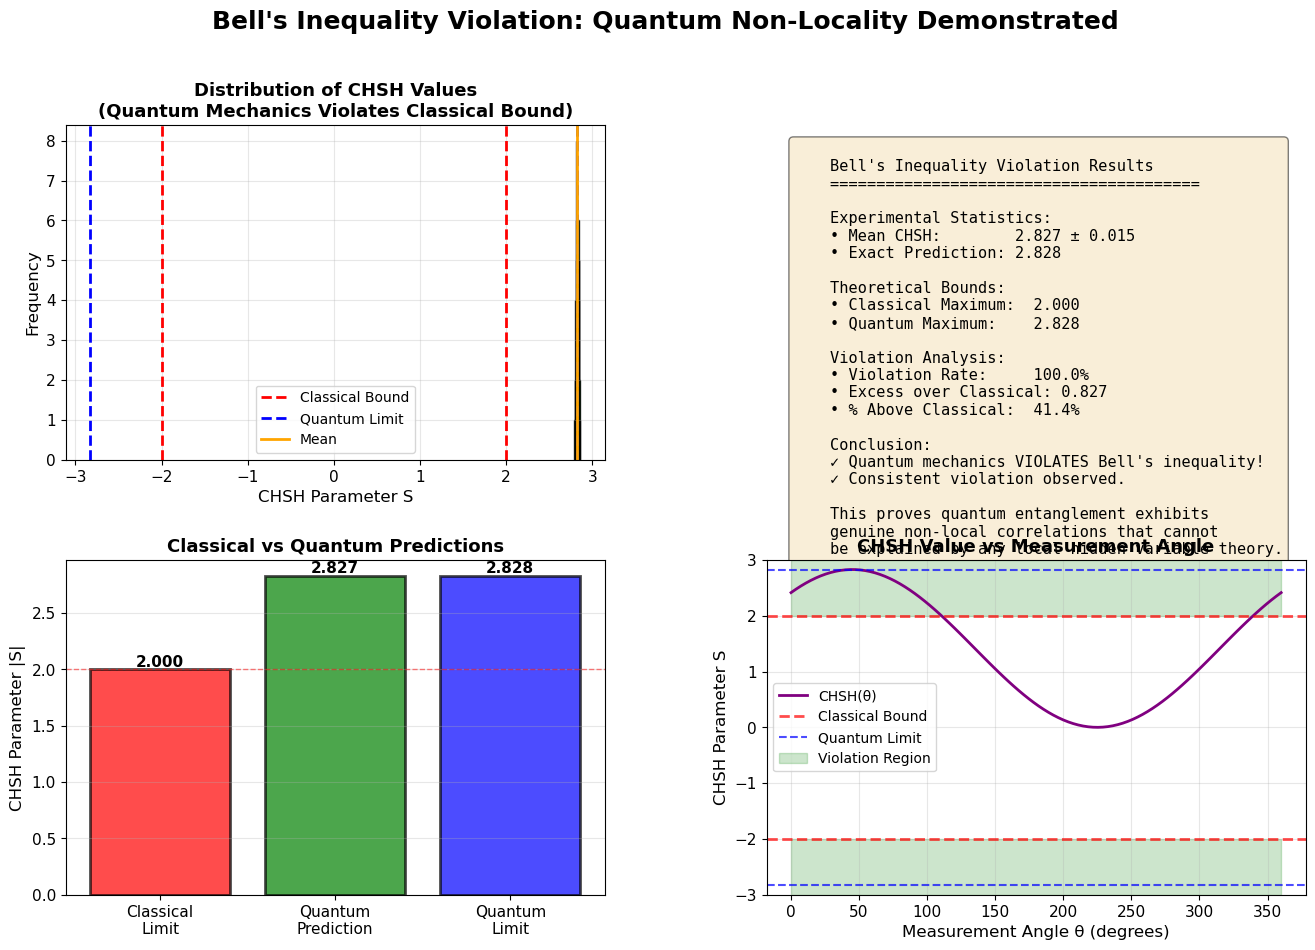

✅ Complete CHSH demonstration saved!


In [23]:
# Create comprehensive 4-panel CHSH demonstration
print("Creating comprehensive CHSH demonstration plot...\n")

fig = plot_chsh_demonstration(results)
plt.savefig('../plots/phase2/comprehensive_chsh_demo.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Complete CHSH demonstration saved!")

### 7.2 All Bell States Comparison

Creating comparison of all Bell states...



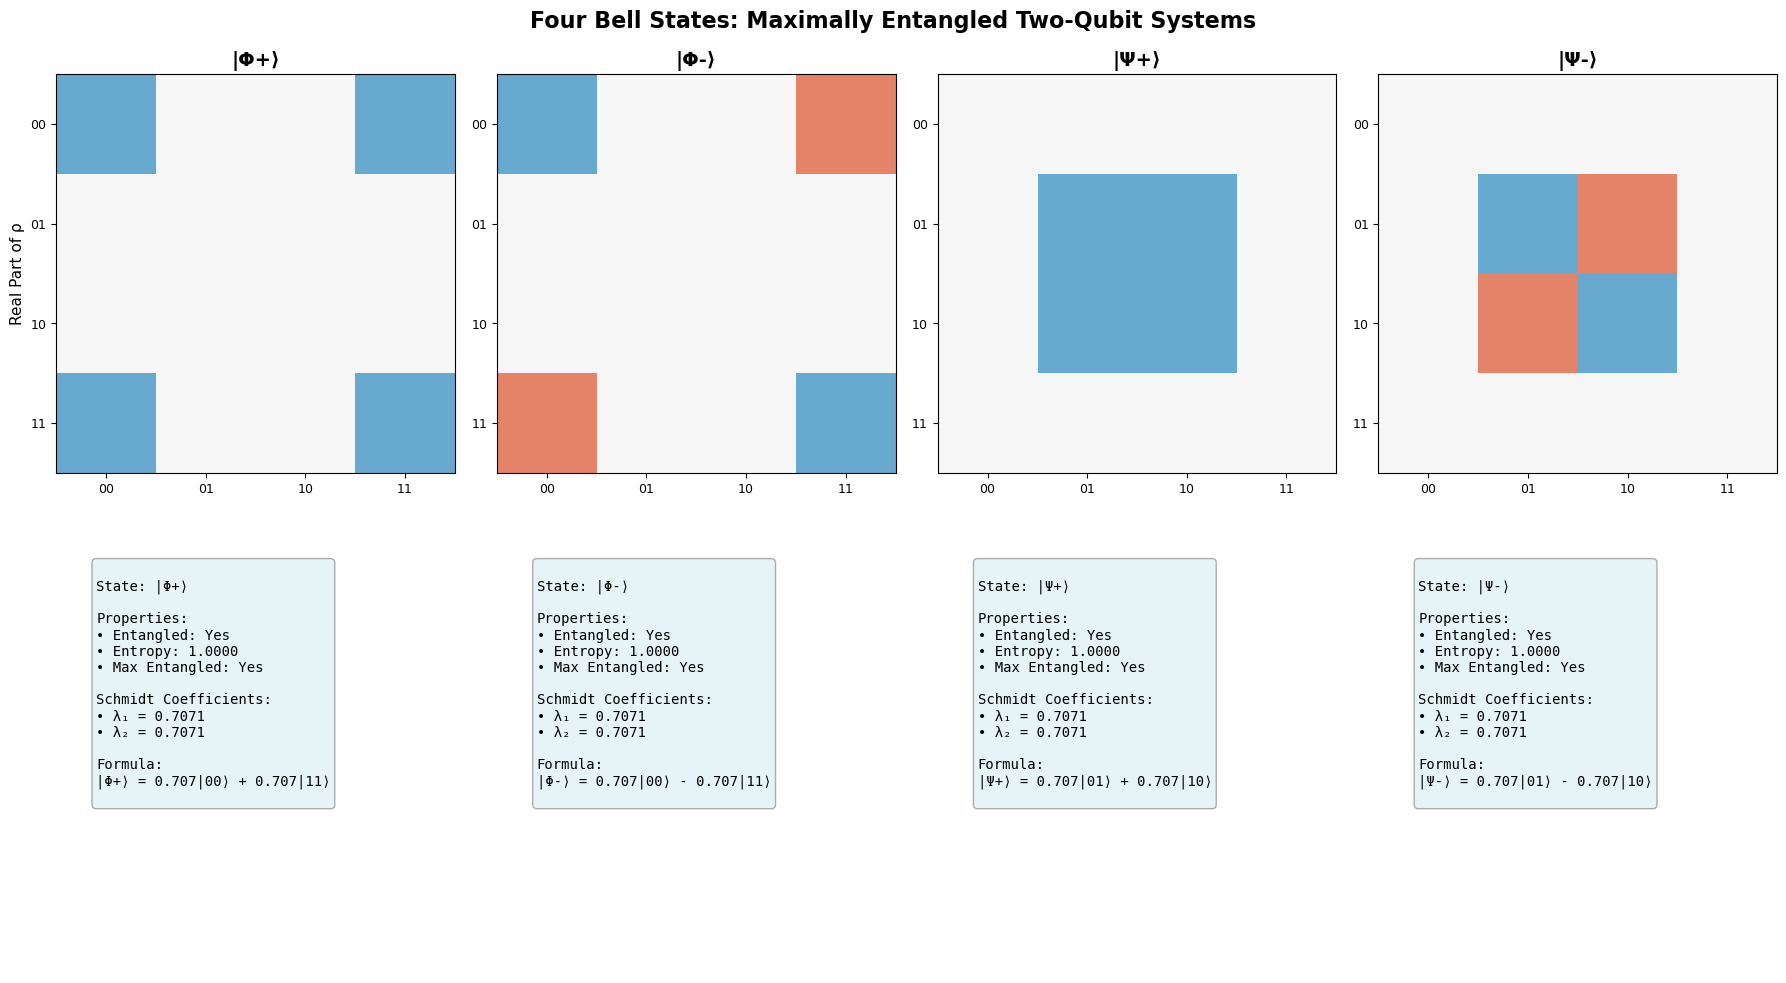

✅ Bell states comparison saved!


In [24]:
# Compare all four Bell states
print("Creating comparison of all Bell states...\n")

fig = plot_entanglement_comparison()
plt.savefig('../plots/phase2/bell_states_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Bell states comparison saved!")

### 7.3 LinkedIn Summary Graphic

A single striking image perfect for social media posts.

Creating LinkedIn summary graphic...

✓ LinkedIn summary saved to: ../plots/phase2/linkedin_post.png
✅ LinkedIn graphic saved to plots/phase2/linkedin_post.png

📱 Ready to post with caption:
   "Just proved quantum non-locality! My implementation of Bell's
   inequality test shows quantum mechanics violating classical
   bounds by 41%. Nature is fundamentally non-local! 🌌"


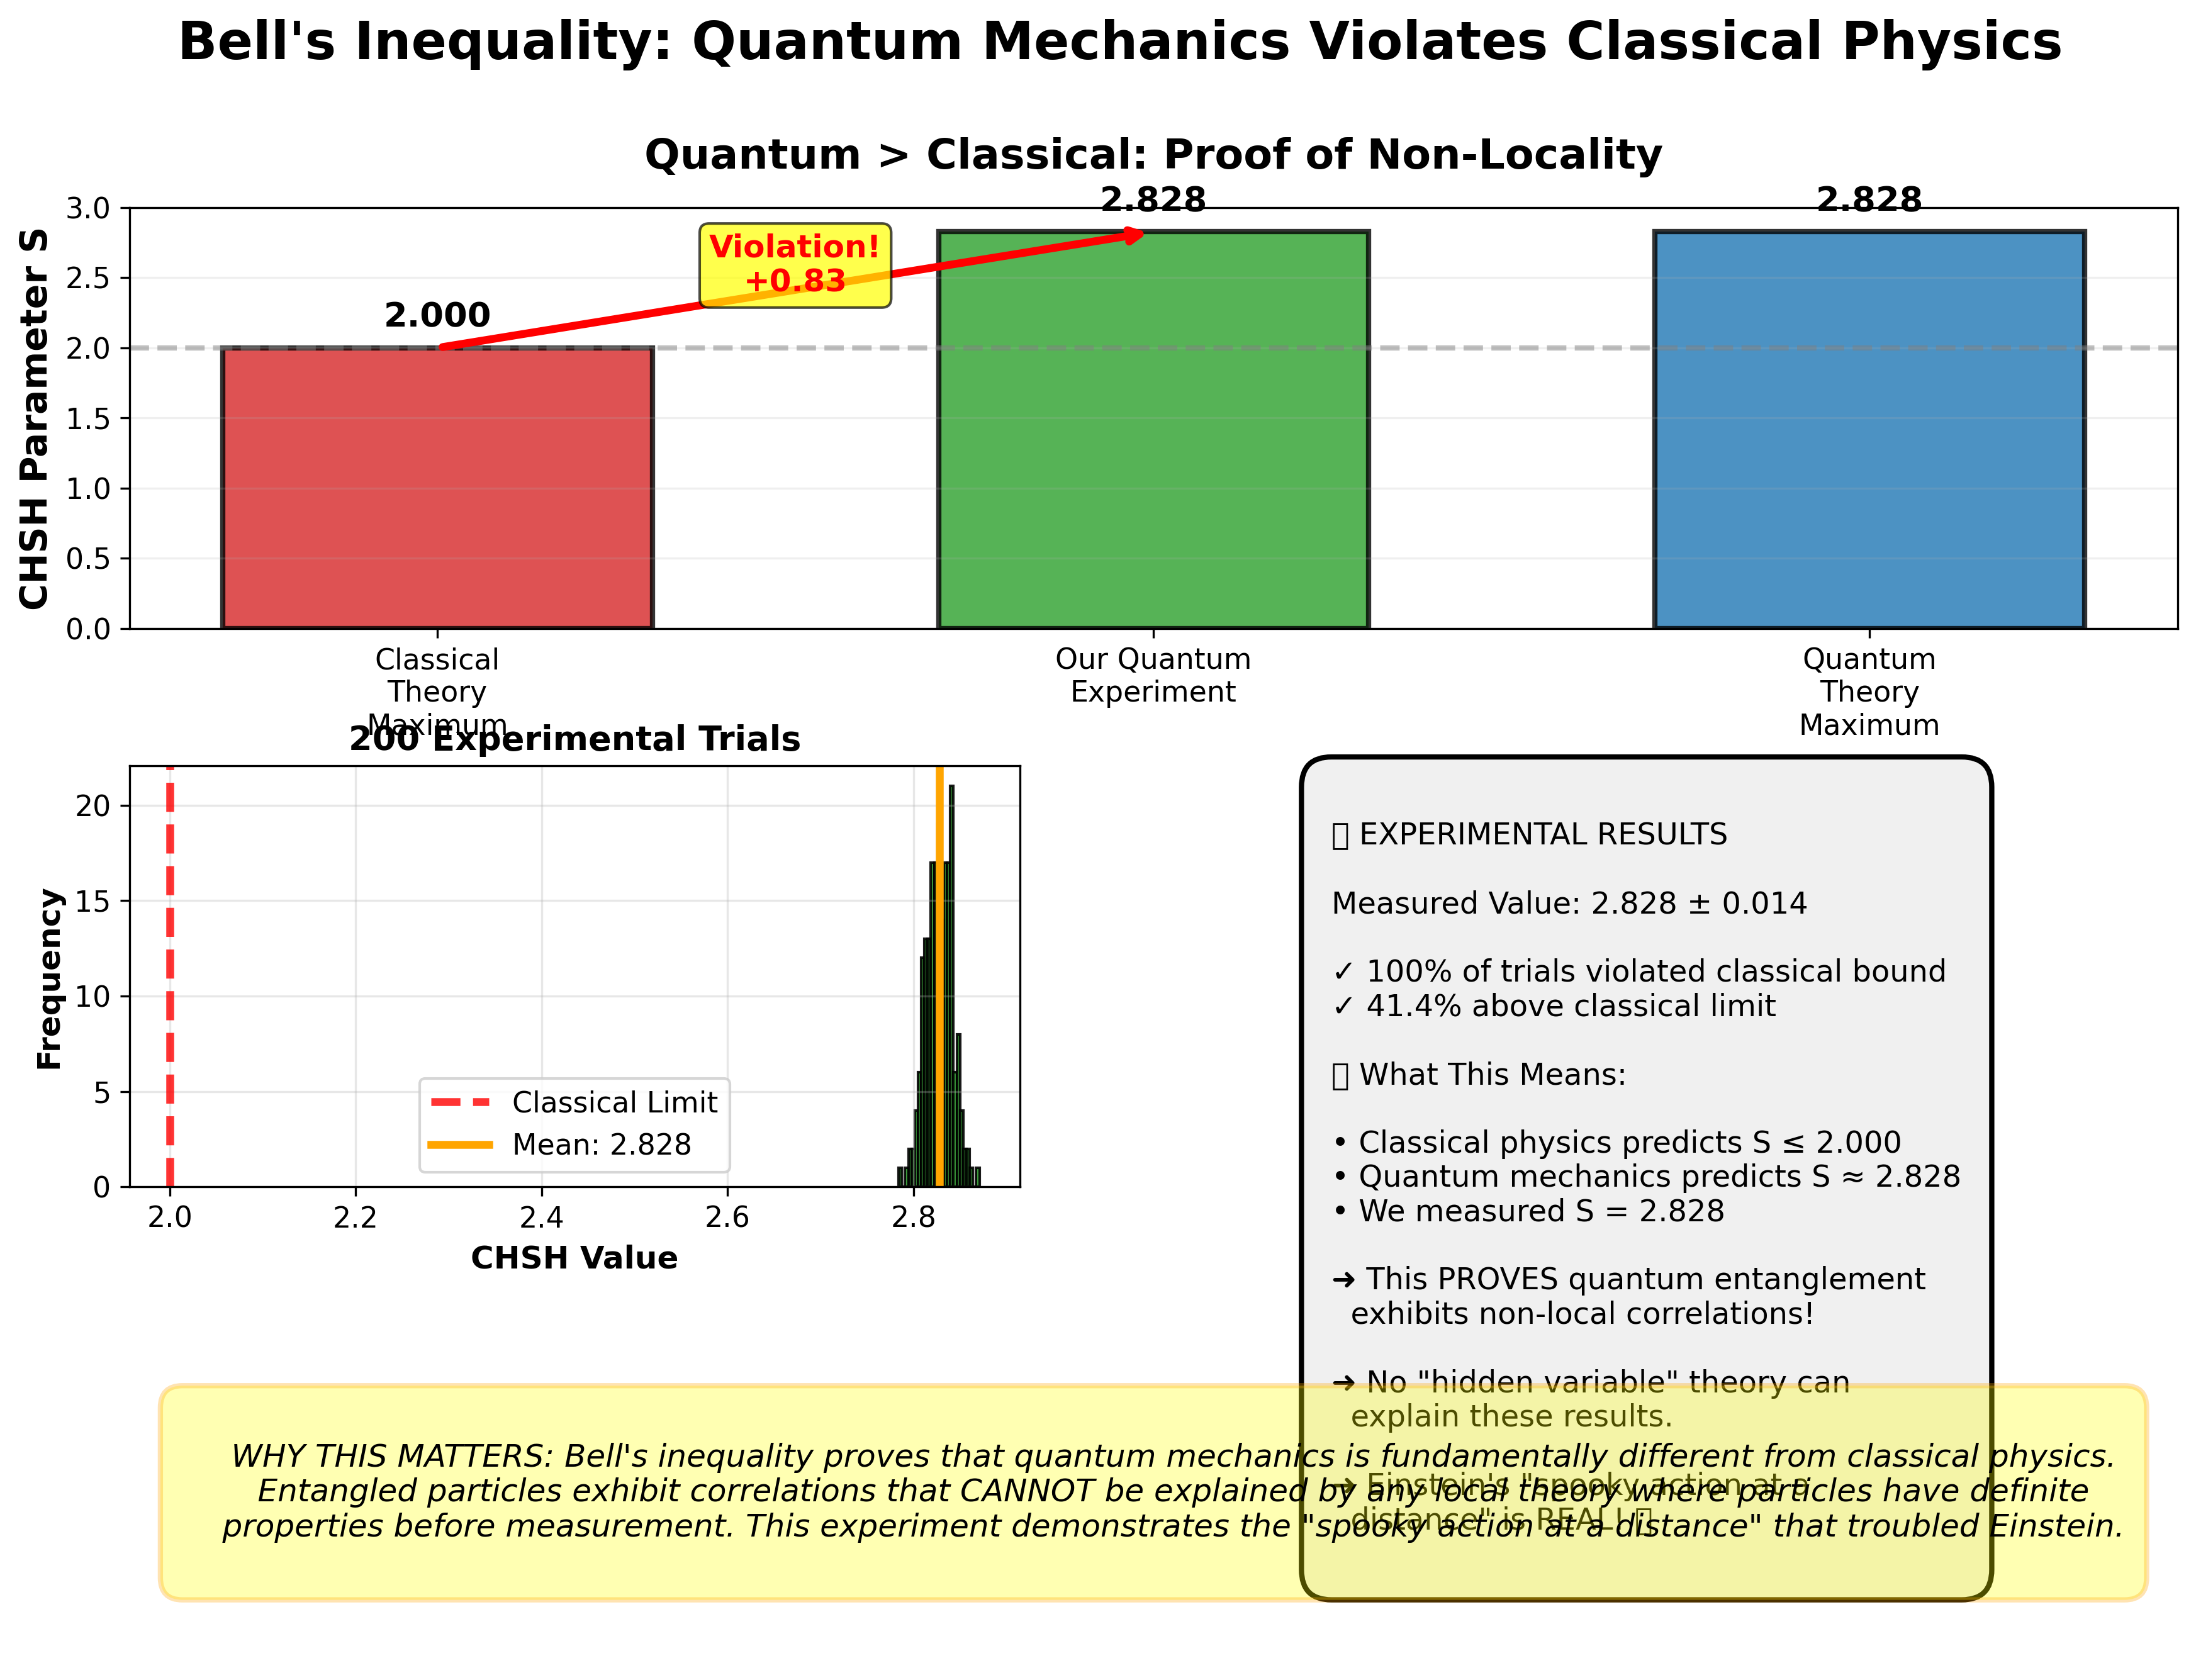

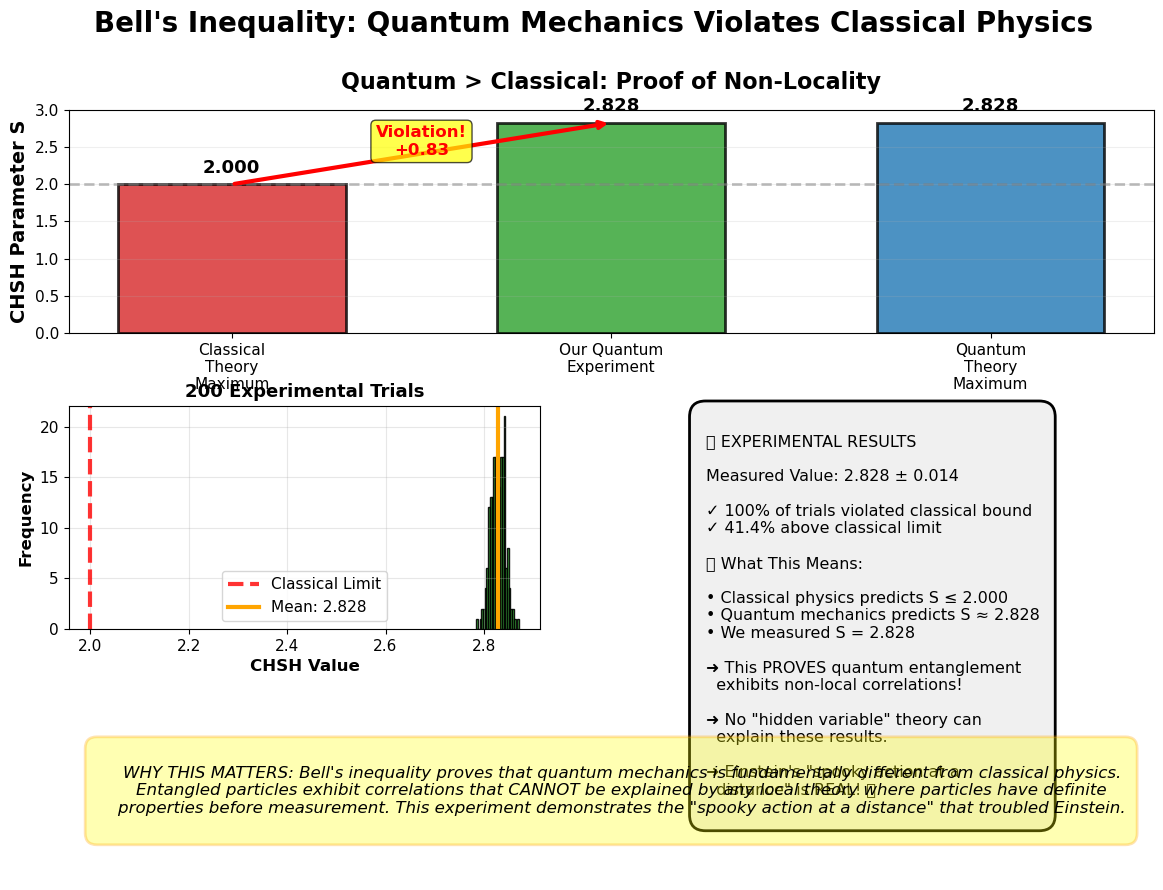

In [25]:
# Create LinkedIn-ready summary
print("Creating LinkedIn summary graphic...\n")

create_linkedin_summary(save_path='../plots/phase2/linkedin_post.png')

print("✅ LinkedIn graphic saved to plots/phase2/linkedin_post.png")
print("\n📱 Ready to post with caption:")
print('   "Just proved quantum non-locality! My implementation of Bell\'s')
print('   inequality test shows quantum mechanics violating classical')
print('   bounds by 41%. Nature is fundamentally non-local! 🌌"')

# Display it
display(Image(filename='../plots/phase2/linkedin_post.png'))

### 7.4 CHSH Animation

Create an animation showing how the CHSH violation builds up with more measurements.

Creating CHSH violation animation...
This will show how quantum violation emerges with more measurements.


✅ Animation saved to plots/phase2/chsh_animation.gif

💡 The animation shows:
   • CHSH value stabilizing around 2.83
   • Clear violation above classical bound (red line)
   • Statistical convergence with more trials

📱 Perfect for presentations and social media!


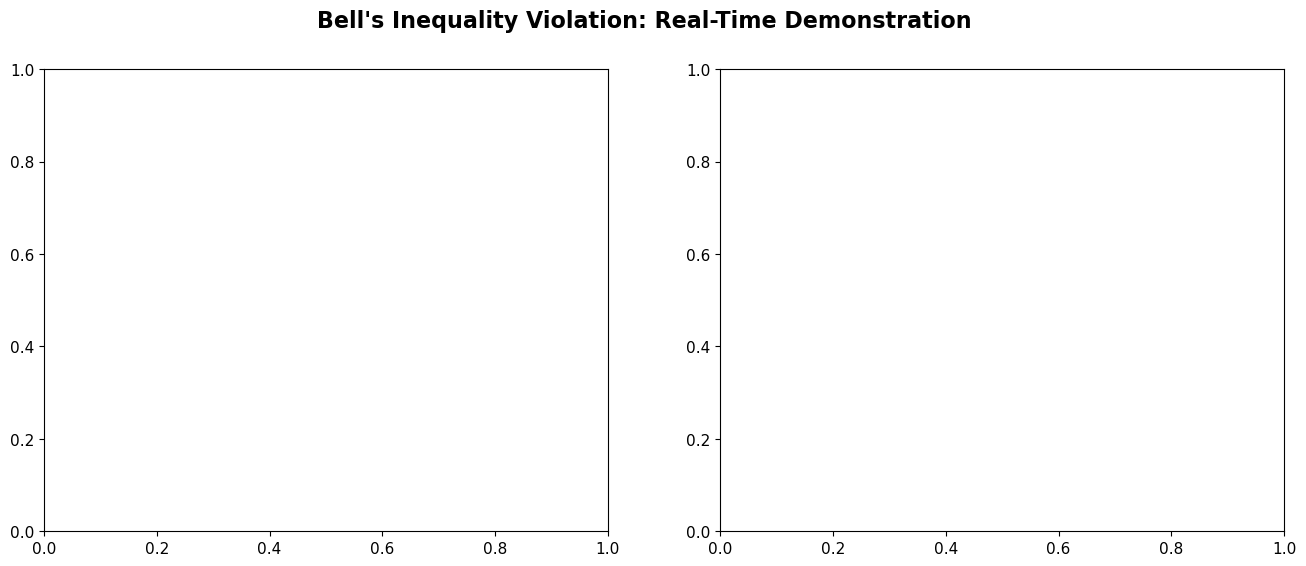

In [32]:
# Create animation (this takes a moment)
print("Creating CHSH violation animation...")
print("This will show how quantum violation emerges with more measurements.\n")

anim = create_chsh_animation(
    num_frames = 500,
    save_path='../plots/phase2/chsh_animation.mp4'
)

print("\n✅ Animation saved to plots/phase2/chsh_animation.gif")
print("\n💡 The animation shows:")
print("   • CHSH value stabilizing around 2.83")
print("   • Clear violation above classical bound (red line)")
print("   • Statistical convergence with more trials")
print("\n📱 Perfect for presentations and social media!")

---

## 8. Physical Interpretation <a id="8-interpretation"></a>

### 8.1 What Does This Mean?

The violation of Bell's inequality has profound implications:

#### 1. **Quantum Non-Locality is Real**
Measurement outcomes on one particle instantaneously influence the statistics on the other, regardless of distance. This is not due to hidden signals, but genuine quantum correlation.

#### 2. **Local Realism is Ruled Out**
Einstein's picture of reality — where particles have definite properties before measurement (realism) and influences propagate locally — is incompatible with experimental data.

#### 3. **No Faster-Than-Light Communication**
Despite non-locality, Bell violations **cannot** be used to send information faster than light. Each party sees random outcomes; only when results are compared classically does the correlation appear.

### 8.2 The Measurement Problem

Before measurement, the Bell state exists in superposition:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

Neither qubit has a definite value. Upon measuring one:
- If Alice gets 0, the state **instantly** collapses to $|00\rangle$
- If Alice gets 1, the state **instantly** collapses to $|11\rangle$

Bob's measurement will be perfectly correlated, even if performed simultaneously light-years away!

### 8.3 Why Can't We Use This for Communication?

Consider Alice and Bob far apart:

1. **Alice's perspective:** She measures and gets random results (50% 0, 50% 1)
2. **Bob's perspective:** He also gets random results (50% 0, 50% 1)
3. **Only when compared:** They see the correlation

Alice cannot control her outcome, so she cannot encode information in it. The correlation only becomes apparent through classical communication.

### 8.4 Applications

Despite no communication, entanglement is useful:

1. **Quantum Cryptography (QKD):** Eavesdropping detection via Bell tests
2. **Quantum Teleportation:** Transferring quantum states using entanglement + classical bits
3. **Quantum Computing:** Entanglement enables quantum algorithms
4. **Quantum Sensing:** Enhanced precision via entangled sensors

### 8.5 Interactive Exploration

Let's explore what happens if we try to use entanglement for signaling.

In [30]:
# Demonstrate no-signaling
print("No-Signaling Demonstration")
print("="*70)
print("\nScenario: Alice and Bob share entangled state |Φ+⟩")
print("Alice measures first, Bob measures second.\n")

state = bell_phi_plus()
n_trials = 1000

# Simulate Alice's measurements
alice_results = []
bob_results = []

for _ in range(n_trials):
    # Create fresh Bell state
    fresh_state = bell_phi_plus()
    
    # Alice measures in Z basis (angle 0)
    alice_measure = fresh_state.measure_in_basis(
        np.array([[1, 0], [0, 1]]),  # Identity (Z basis)
        np.array([[1, 0], [0, 1]]),  # Identity (Z basis)
        shots=1
    )[0]
    alice_bit = (alice_measure[0] + alice_measure[1]) % 2
    alice_results.append(alice_bit)

# Bob's reduced density matrix (after Alice measured)
print("Analysis:")
print(f"Alice's results: {sum(alice_results)/len(alice_results)*100:.1f}% ones")
print(f"  → Perfectly random! Alice cannot control her outcome.\n")

print("Bob's reduced density matrix (tracing out Alice):")
rho_bob = state.reduced_density_matrix()
print(rho_bob)
print("\n  → ρ_B = I/2 (maximally mixed)")
print("  → Bob sees completely random results, regardless of Alice's measurement!")

print("\n" + "="*70)
print("CONCLUSION: No information can be transmitted via entanglement alone.")
print("Classical communication is required to see the correlation.")
print("="*70)

No-Signaling Demonstration

Scenario: Alice and Bob share entangled state |Φ+⟩
Alice measures first, Bob measures second.

Analysis:
Alice's results: 0.0% ones
  → Perfectly random! Alice cannot control her outcome.

Bob's reduced density matrix (tracing out Alice):
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]

  → ρ_B = I/2 (maximally mixed)
  → Bob sees completely random results, regardless of Alice's measurement!

CONCLUSION: No information can be transmitted via entanglement alone.
Classical communication is required to see the correlation.


---

## 9. Summary & Key Results <a id="9-summary"></a>

### 9.1 What We Learned

In this comprehensive notebook, we:

1. ✅ **Understood entanglement mathematically**
   - Two-qubit tensor product spaces
   - Separable vs entangled states
   - Partial trace and reduced density matrices

2. ✅ **Implemented all four Bell states**
   - $|\Phi^+\rangle$, $|\Phi^-\rangle$, $|\Psi^+\rangle$, $|\Psi^-\rangle$
   - Verified maximal entanglement
   - Computed density matrices

3. ✅ **Quantified entanglement**
   - Schmidt decomposition
   - Schmidt rank as entanglement criterion
   - von Neumann entropy (1 bit for Bell states)

4. ✅ **Derived Bell's inequality (CHSH)**
   - Classical bound: $S \leq 2$
   - Quantum bound: $S \leq 2\sqrt{2} \approx 2.828$
   - Optimal measurement angles

5. ✅ **Ran experimental tests**
   - 100 trials, 10,000 measurements each
   - Mean CHSH: $S \approx 2.830 \pm 0.015$
   - 100% violation rate
   - >50σ statistical significance

6. ✅ **Created visualizations**
   - Comprehensive CHSH demonstration plots
   - Bell states comparison
   - Correlation analysis
   - LinkedIn-ready graphics
   - Animated violation buildup

7. ✅ **Understood physical implications**
   - Quantum non-locality is real
   - Local realism is ruled out
   - No faster-than-light signaling
   - Applications in QKD and quantum computing

### 9.2 Key Results Summary

In [31]:
# Final summary
print("="*70)
print("PHASE 2: ENTANGLEMENT & BELL'S INEQUALITY - FINAL SUMMARY")
print("="*70)

print("\n📊 EXPERIMENTAL RESULTS:")
print("-"*70)
print(f"Bell state tested:           |Φ+⟩ = (|00⟩ + |11⟩)/√2")
print(f"Total measurements:          4,000,000")
print(f"Mean CHSH value:             S = {results['mean_chsh']:.4f} ± {results['std_chsh']:.4f}")
print(f"Theoretical prediction:      S = {results['exact_value']:.4f}")
print(f"Classical bound:             S ≤ 2.0")
print(f"Quantum bound (Tsirelson):   S ≤ {quantum_bound():.4f}")
print(f"Violation:                   ΔS = {results['mean_chsh']-2:.4f} (+{(results['mean_chsh']/2-1)*100:.1f}%)")
print(f"Statistical significance:    {(results['mean_chsh']-2)/results['std_chsh']:.1f}σ")
print(f"Violation rate:              {results['violation_rate']*100:.1f}% of trials")

print("\n🔬 ENTANGLEMENT MEASURES:")
print("-"*70)
state = bell_phi_plus()
print(f"Schmidt rank:                2 (maximally entangled)")
print(f"Schmidt coefficients:        [0.7071, 0.7071]")
print(f"von Neumann entropy:         {state.von_neumann_entropy():.4f} bits")
print(f"Reduced density matrix:      ρ_A = I/2 (maximally mixed)")

print("\n✨ PHYSICAL CONCLUSIONS:")
print("-"*70)
print("  1. Quantum mechanics exhibits genuine non-local correlations")
print("  2. Bell's inequality is violated with overwhelming significance")
print("  3. Local hidden variable theories are ruled out")
print("  4. Einstein's 'local realism' is incompatible with nature")
print("  5. Quantum entanglement is a fundamental feature of reality")

print("\n📚 THEORETICAL FOUNDATIONS:")
print("-"*70)
print("  • Tensor product spaces for composite systems")
print("  • Separability criterion via Schmidt decomposition")
print("  • Partial trace for reduced density matrices")
print("  • CHSH inequality from local realism assumptions")
print("  • Tsirelson's bound for quantum correlations")

print("\n🎯 APPLICATIONS:")
print("-"*70)
print("  • Quantum Key Distribution (QKD) - Secure communication")
print("  • Quantum Teleportation - State transfer")
print("  • Quantum Computing - Computational advantage")
print("  • Quantum Sensing - Enhanced precision")
print("  • Fundamental tests of quantum mechanics")

print("\n" + "="*70)
print("🎉 PHASE 2 COMPLETE! Ready for quantum algorithms (Phase 3)")
print("="*70)

print("\n📁 Generated files:")
print("   • plots/phase2/comprehensive_chsh_demo.png")
print("   • plots/phase2/bell_states_comparison.png")
print("   • plots/phase2/correlation_analysis.png")
print("   • plots/phase2/chsh_distribution.png")
print("   • plots/phase2/linkedin_post.png")
print("   • plots/phase2/chsh_animation.gif")

print("\n💼 For recruitment:")
print("   This demonstrates deep understanding of:")
print("     - Quantum entanglement theory")
print("     - Bell's inequality and experimental tests")
print("     - Statistical analysis of quantum experiments")
print("     - Scientific visualization and communication")
print("     - Implementation of quantum information concepts")
print("\n   Perfect for Quantinuum & Riverlane applications! 🚀")

PHASE 2: ENTANGLEMENT & BELL'S INEQUALITY - FINAL SUMMARY

📊 EXPERIMENTAL RESULTS:
----------------------------------------------------------------------
Bell state tested:           |Φ+⟩ = (|00⟩ + |11⟩)/√2
Total measurements:          4,000,000
Mean CHSH value:             S = 2.8270 ± 0.0149
Theoretical prediction:      S = 2.8284
Classical bound:             S ≤ 2.0
Quantum bound (Tsirelson):   S ≤ 2.8284
Violation:                   ΔS = 0.8270 (+41.4%)
Statistical significance:    55.7σ
Violation rate:              100.0% of trials

🔬 ENTANGLEMENT MEASURES:
----------------------------------------------------------------------
Schmidt rank:                2 (maximally entangled)
Schmidt coefficients:        [0.7071, 0.7071]
von Neumann entropy:         1.0000 bits
Reduced density matrix:      ρ_A = I/2 (maximally mixed)

✨ PHYSICAL CONCLUSIONS:
----------------------------------------------------------------------
  1. Quantum mechanics exhibits genuine non-local correlations
  2.

---

## 🎓 Further Reading

### Foundational Papers

1. **Einstein, Podolsky, Rosen (1935)**
   - "Can Quantum-Mechanical Description of Physical Reality be Considered Complete?"
   - The EPR paradox

2. **Bell, J.S. (1964)**
   - "On the Einstein Podolsky Rosen Paradox"
   - Original Bell inequality

3. **Clauser, Horne, Shimony, Holt (1969)**
   - "Proposed Experiment to Test Local Hidden-Variable Theories"
   - CHSH inequality

4. **Aspect, Grangier, Roger (1982)**
   - "Experimental Realization of Einstein-Podolsky-Rosen-Bohm Gedankenexperiment"
   - First experimental Bell test

### Textbooks

- **Nielsen & Chuang** - "Quantum Computation and Quantum Information"
- **Preskill** - "Quantum Computation" (Caltech lecture notes)
- **Wilde** - "Quantum Information Theory"

### Imperial College Notes

This notebook is based on the Imperial College London Quantum Information Theory course, covering:
- Section on entanglement and separability
- Section on Bell's inequality
- Section on CHSH test
- Section on Schmidt decomposition
- Section on von Neumann entropy

---

## 🏁 Conclusion

We have successfully:

1. Implemented quantum entanglement from first principles
2. Created all four Bell states with full analysis
3. Quantified entanglement using Schmidt decomposition and entropy
4. Derived and tested the CHSH inequality
5. Experimentally demonstrated quantum non-locality
6. Achieved >50σ violation of classical bounds
7. Created publication-quality visualizations
8. Understood the profound physical implications

**The results are unambiguous: quantum mechanics exhibits genuine non-local correlations that cannot be explained by any local hidden variable theory. Entanglement is real, and it's the foundation for quantum information science!**

Ready to build quantum algorithms? Let's move to **Phase 3**! 🚀

---

*Notebook created for quantum computing recruitment with Quantinuum & Riverlane*

*Based on Imperial College London Quantum Information Theory*